# Activity 2.1 : Convolutional Neural Network

#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

* Shuffle the data
* Split the data into train and test sets

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [ ]:

x_train[444].shape

(32, 32, 3)

Visualize one of the images

[9]


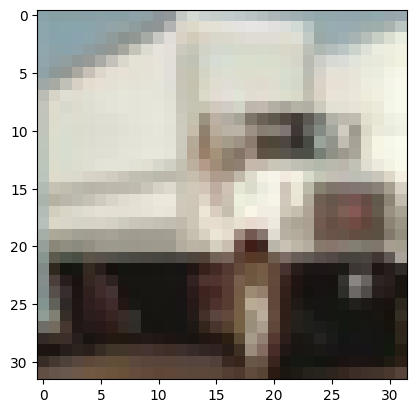

In [ ]:
print(y_train[444])
plt.imshow(x_train[444]);

In [ ]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [ ]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Convert to float and scale the datasets

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential

In [ ]:

model_1 = Sequential()

## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 16, 16, 32)        2432      
                                                                 
 activation_16 (Activation)  (None, 16, 16, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 6, 6, 32)          25632     
                                                                 
 activation_17 (Activation)  (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 3, 3, 32)          0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 3, 3, 32)          0         
                                                      

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [ ]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 38s 24ms/step - loss: 1.7070 - accuracy: 0.3813 - val_loss: 1.4198 - val_accuracy: 0.4908
Epoch 2/15
1563/1563 [==============================] - 36s 23ms/step - loss: 1.4466 - accuracy: 0.4830 - val_loss: 1.3763 - val_accuracy: 0.5165
Epoch 3/15
1563/1563 [==============================] - 38s 24ms/step - loss: 1.3637 - accuracy: 0.5166 - val_loss: 1.2421 - val_accuracy: 0.5595
Epoch 4/15
1563/1563 [==============================] - 36s 23ms/step - loss: 1.3162 - accuracy: 0.5396 - val_loss: 1.2548 - val_accuracy: 0.5683
Epoch 5/15
1563/1563 [==============================] - 36s 23ms/step - loss: 1.2840 - accuracy: 0.5508 - val_loss: 1.2565 - val_accuracy: 0.5706
Epoch 6/15
1563/1563 [==============================] - 35s 22ms/step - loss: 1.2724 - accuracy: 0.5619 - val_loss: 1.2793 - val_accuracy: 0.5612
Epoch 7/15
1563/1563 [==============================] - 36s 23ms/step - loss: 1.2577 - accuracy: 0.5666 - val_loss: 1.1722 -

In [ ]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.5379689931869507
Test accuracy: 0.4830000102519989


#### Supplementary Activity

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Compare the training time, loss and accuracy numbers (on both the training and validation sets).

* Use different structures and run times, and see how accurate your model can be.

In [ ]:
modelsa_1 = Sequential()

## 10x10 convolution with 1 stride and 16 filters
modelsa_1.add(Conv2D(16, (10, 10), strides = 1, padding='same',
                 input_shape=x_train.shape[1:]))
modelsa_1.add(Activation('relu'))

modelsa_1.add(Conv2D(16, (10, 10), strides = 1))
modelsa_1.add(Activation('relu'))

modelsa_1.add(MaxPooling2D(pool_size=(2,2)))
modelsa_1.add(Dropout(0.2))

## 5x5 convolution with 1 stride and 32 filters
modelsa_1.add(Conv2D(32, (5, 5), strides = 1, padding='same'))
modelsa_1.add(Activation('relu'))

modelsa_1.add(Conv2D(32, (5, 5), strides = 1))
modelsa_1.add(Activation('relu'))

modelsa_1.add(MaxPooling2D(pool_size=(2,2)))
modelsa_1.add(Dropout(0.25))

modelsa_1.add(Flatten())
modelsa_1.add(Dense(512))
modelsa_1.add(Activation('relu'))
modelsa_1.add(Dropout(0.5))
modelsa_1.add(Dense(num_classes))
modelsa_1.add(Activation('softmax'))

modelsa_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 16)        4816      
                                                                 
 activation_20 (Activation)  (None, 32, 32, 16)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 23, 23, 16)        25616     
                                                                 
 activation_21 (Activation)  (None, 23, 23, 16)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 11, 11, 16)        0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 11, 11, 16)        0         
                                                      

model_1 total number of parameters: 181,162

modelsa_1 total number of parameters: 147,968

The first model takes a higher number of parameters compared to the newer model made.

In [ ]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)

modelsa_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

modelsa_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 451s 288ms/step - loss: 1.8867 - accuracy: 0.3065 - val_loss: 1.5830 - val_accuracy: 0.4137
Epoch 2/5
1563/1563 [==============================] - 442s 283ms/step - loss: 1.6331 - accuracy: 0.4098 - val_loss: 1.5432 - val_accuracy: 0.4510
Epoch 3/5
1563/1563 [==============================] - 443s 283ms/step - loss: 1.5750 - accuracy: 0.4360 - val_loss: 1.4747 - val_accuracy: 0.4702
Epoch 4/5
1563/1563 [==============================] - 433s 277ms/step - loss: 1.5667 - accuracy: 0.4414 - val_loss: 1.5551 - val_accuracy: 0.4348
Epoch 5/5
1563/1563 [==============================] - 431s 276ms/step - loss: 1.5683 - accuracy: 0.4450 - val_loss: 1.4495 - val_accuracy: 0.4855


In [ ]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Model 1 Test Loss:', score[0])
print('Model 1 Test Accuracy:', score[1])

print('---------------------------------')

score_sa = modelsa_1.evaluate(x_test, y_test, verbose=0)
print('SA Model 1 Test Loss:', score_sa[0])
print('SA Model 1 Test Accuracy:', score_sa[1])

Model 1 Test Loss: 1.5379689931869507
Model 1 Test Accuracy: 0.4830000102519989
---------------------------------
SA Model 1 Test Loss: 1.4494928121566772
SA Model 1 Test Accuracy: 0.4855000078678131


In [ ]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('loss')
    ax.grid(True)


    ax = fig.add_subplot(1, 2, 2)
    ax.plot(history.history["accuracy"],'r-x', label="Train Accuracy")
    ax.plot(history.history["val_accuracy"],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('accuracy')
    ax.grid(True)

In [ ]:
modelsa_2 = Sequential()

## 4x4 convolution with 1 stride and 32 filters
modelsa_2.add(Conv2D(32, (4, 4), strides = 1, padding='same',
                 input_shape=x_train.shape[1:]))
modelsa_2.add(Activation('relu'))

modelsa_2.add(Conv2D(32, (4, 4), strides = 1))
modelsa_2.add(Activation('relu'))

modelsa_2.add(MaxPooling2D(pool_size=(2,2)))
modelsa_2.add(Dropout(0.2))

## 2x2 convolution with 1 stride and 64 filters
modelsa_2.add(Conv2D(64, (2, 2), strides = 1, padding='same'))
modelsa_2.add(Activation('relu'))

modelsa_2.add(Conv2D(64, (2, 2), strides = 1))
modelsa_2.add(Activation('relu'))

modelsa_2.add(MaxPooling2D(pool_size=(2,2)))
modelsa_2.add(Dropout(0.25))

modelsa_2.add(Flatten())
modelsa_2.add(Dense(512))
modelsa_2.add(Activation('relu'))
modelsa_2.add(Dropout(0.5))
modelsa_2.add(Dense(num_classes))
modelsa_2.add(Activation('softmax'))

modelsa_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        1568      
                                                                 
 activation_26 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 29, 29, 32)        16416     
                                                                 
 activation_27 (Activation)  (None, 29, 29, 32)        0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 14, 14, 32)        0         
                                                      

In [ ]:
batch_size = 30

opt = keras.optimizers.RMSprop(lr=0.0005)

modelsa_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

m2hist = modelsa_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=10,
              validation_data=(x_test, y_test))

Epoch 1/10
1667/1667 [==============================] - 287s 171ms/step - loss: 1.5872 - accuracy: 0.4257 - val_loss: 1.2883 - val_accuracy: 0.5355
Epoch 2/10
1667/1667 [==============================] - 283s 170ms/step - loss: 1.2370 - accuracy: 0.5629 - val_loss: 1.1391 - val_accuracy: 0.5938
Epoch 3/10
1667/1667 [==============================] - 285s 171ms/step - loss: 1.1045 - accuracy: 0.6142 - val_loss: 0.9504 - val_accuracy: 0.6695
Epoch 4/10
1667/1667 [==============================] - 276s 165ms/step - loss: 1.0355 - accuracy: 0.6411 - val_loss: 0.9237 - val_accuracy: 0.6847
Epoch 5/10
1667/1667 [==============================] - 273s 164ms/step - loss: 0.9956 - accuracy: 0.6586 - val_loss: 0.9088 - val_accuracy: 0.6914
Epoch 6/10
1667/1667 [==============================] - 275s 165ms/step - loss: 0.9919 - accuracy: 0.6667 - val_loss: 0.9983 - val_accuracy: 0.6628
Epoch 7/10
1667/1667 [==============================] - 276s 166ms/step - loss: 0.9834 - accuracy: 0.6718 - val_

In [ ]:
score = model_1.evaluate(x_test, y_test, verbose=0)
print('Model 1 Test Loss:', score[0])
print('Model 1 Test Accuracy:', score[1])

print('---------------------------------')

score_sa1 = modelsa_1.evaluate(x_test, y_test, verbose=0)
print('SA Model 1 Test Loss:', score_sa1[0])
print('SA Model 1 Test Accuracy:', score_sa1[1])

print('---------------------------------')

score_sa2 = modelsa_2.evaluate(x_test, y_test, verbose=0)
print('SA Model 2 Test Loss:', score_sa2[0])
print('SA Model 2 Test Accuracy:', score_sa2[1])

Model 1 Test Loss: 1.5379689931869507
Model 1 Test Accuracy: 0.4830000102519989
---------------------------------
SA Model 1 Test Loss: 1.4494928121566772
SA Model 1 Test Accuracy: 0.4855000078678131
---------------------------------
SA Model 2 Test Loss: 1.1625723838806152
SA Model 2 Test Accuracy: 0.6223000288009644


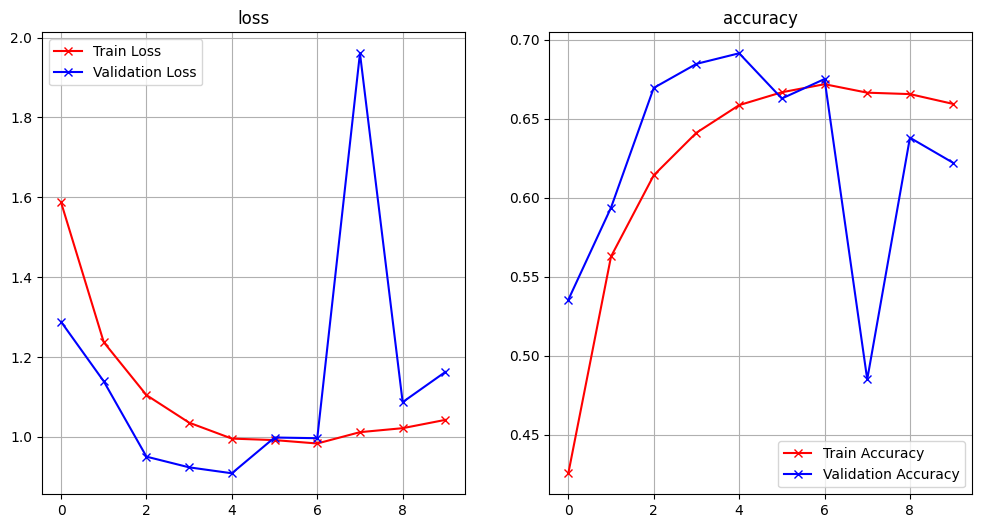

In [ ]:
plot_loss_accuracy(m2hist)

#### Conclusion

#type your answer here